In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


In [35]:
df = pd.read_csv('REN_Bank.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [36]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [37]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [38]:
null = df.isnull().sum()
null[null>0]

Saving accounts     183
Checking account    394
dtype: int64

In [39]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [40]:
df.describe(include='O')  #lets you  get an overview of the categorical columns

,Sex,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,817,606,1000
unique,2,3,4,3,8
top,male,own,little,little,car
freq,690,713,603,274,337


In [41]:
df.shape

(1000, 10)

Data Transfomation

Using skleaen

In [42]:
print(df['Saving accounts'].unique())
sa=df['Saving accounts'].dropna()

print(df['Checking account'].unique())
ca=df['Checking account'].dropna()

[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']


In [43]:
sa.unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [44]:
sa=enc.fit_transform(sa)
print(sa.mean().round())
# print(sa)

ca=enc.fit_transform(ca)
print(ca.mean().round())
print(ca)

0.0
1.0
[0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 2 1 0 1 0 1 2 1 2 2 1 1 1 0 0 0 1 1 1
 1 2 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 2 1 1 1 1 1 1 1 1 1 0 1 1 2 1
 0 0 0 0 1 0 2 1 0 0 1 1 0 1 0 1 1 2 2 1 0 0 1 0 0 2 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 2 1 0 2 0 1 0 1 0 0 2
 1 0 1 1 0 0 0 2 0 2 1 1 1 0 0 0 0 1 0 1 1 0 0 2 1 0 0 1 1 0 1 0 2 1 1 1 2
 0 0 1 1 1 2 1 2 0 0 1 0 1 0 0 0 0 2 1 0 1 0 0 1 0 0 1 1 0 1 1 2 1 1 1 1 0
 1 0 1 2 2 0 0 0 1 1 0 1 0 1 2 1 1 1 0 0 1 0 0 1 1 1 1 0 2 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 2 0 1 1 0 1 2 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 2 1 0 1 1 0 1
 1 1 0 0 1 1 2 0 0 2 1 0 2 1 0 2 1 0 0 0 0 0 1 1 0 0 1 1 2 0 1 0 2 1 0 2 0
 0 0 1 1 1 1 0 1 0 0 2 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 2 0 1 0 2 0 0 1 1 0 1 1 0 0 2 1 0 0 1 1 0 0 1 0 0 2 0 0 1 0 1 0 1 1
 1 2 0 1 2 1 0 2 1 0 1 2 1 0 0 1 1 0 1 2 0 2 1 1 1 1 1 1 0 0 1 2 1 2 1 0 1
 0 1 2 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 2 2 0 0 0 1 0 1 0 0 2 0 0 1 1 1
 1 1 1 1 0 1 2 0 

In [45]:
label_mapping=dict(zip(enc.classes_ , range(len(enc.classes_))))
print(label_mapping)

checking_label_mapping=dict(zip(enc.classes_ , range(len(enc.classes_))))
print(checking_label_mapping)

{'little': 0, 'moderate': 1, 'rich': 2}
{'little': 0, 'moderate': 1, 'rich': 2}


In [46]:
df['Saving accounts']=df['Saving accounts'].fillna(value='little')
df['Saving accounts'].isnull().sum()

np.int64(0)

In [57]:
df['Checking account']=df['Checking account'].fillna(value='moderate')
df['Checking account'].isnull().sum()

np.int64(0)

In [48]:
df.loc[df['Credit amount'] == 18424]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
915,915,32,female,3,own,little,little,18424,48,vacation/others


<Axes: xlabel='Unnamed: 0', ylabel='Credit amount'>

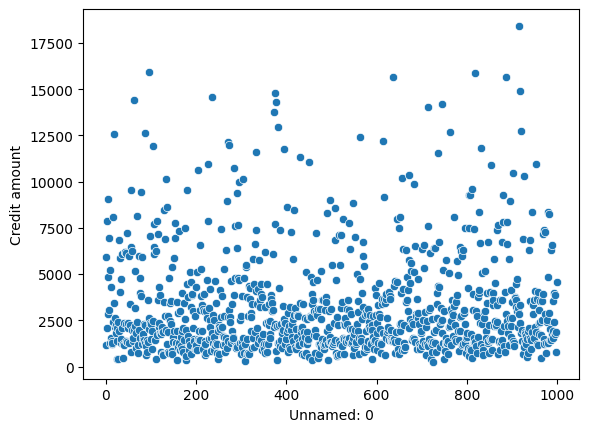

In [49]:
sns.scatterplot(x='Unnamed: 0',y='Credit amount',data=df)

In [50]:
def cred_score(score):
    if score < df['Credit amount'].mean():
        return 0
    elif score >= df['Credit amount'].mean():
        return 1
    
    #Where 1=Good Credit and 0=Bad credit

In [51]:
df['Credit score']=df['Credit amount'].apply(cred_score)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit score
0,0,67,male,2,own,little,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,little,5951,48,radio/TV,1
2,2,49,male,1,own,little,little,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


MACHINE LEARNING

In [52]:
from sklearn.model_selection import train_test_split,GridSearchCV
#GridsearchCv helps find the best hyper parameters for a model by testing multiple combination
# Hyper parameters are placed within a model and helps to make beter predictions 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #so we dont have to type LogisticRegression all the time
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# StandardScaler scales and normalises numerical features around 0's and 1's so the model doesn't focus more on higher values than lower ones. Performs better on Logistic Regression and SVM(support vector machine) and scaled data
# OneHotEncoder encodes data in a format, mostly converts categorical data to numerical data
from sklearn.compose import ColumnTransformer
# ColumnTransfomer allows for simultaneous column transfomation,
from  sklearn.pipeline import Pipeline
# Pipeline works with columnTransformer. Chains multiple preprocessing 
from sklearn.svm import SVC #SupportVectorClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# accuracy_score measures the accuracy of the model
# confution_matrix also used to check accuracy

In [53]:
lr.get_params()
# These parameters are hyperparameters and apply to all models, helps to boost prediction accuracy

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [54]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose',
       'Credit score'],
      dtype='object')

In [58]:
x=df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration',
       ]]
y=df['Credit score']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=50)

In [61]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit score
0,0,67,male,2,own,little,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,little,5951,48,radio/TV,1
2,2,49,male,1,own,little,little,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


In [ ]:
# x_train.info()
# x_test.info()
# y_train.info()
# y_test.info()

In [72]:
categorical=x.select_dtypes(include='number').columns.to_list()  #extracting categorical columns
categorical

['Age', 'Job', 'Credit amount', 'Duration']

In [75]:
# cat_features=x.select_dtypes(include='O').columns.to_list()
# num_features=x.select_dtypes(include='number').columns.to_list()
cat_features=['Sex', 'Housing', 'Saving accounts', 'Checking account']
num_features=['Age', 'Job', 'Credit amount', 'Duration']

one_hot=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

scaler=StandardScaler()

In [77]:
preprocessor=ColumnTransformer(transformers=[
    ('cat', Pipeline(steps=[
        ('one_hot',one_hot)
    ]),cat_features),
    ('num',Pipeline(steps=[
        ('scaler',scaler)
    ]),num_features)
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Housing', 'Saving accounts',
                                  'Checking account']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Job', 'Credit amount', 'Duration'])])

In [81]:
preprocessor.fit_transform(x_train,x_test)

array([[ 0.        ,  1.        ,  0.        , ...,  0.1281023 ,
        -0.16676748,  0.24055203],
       [ 0.        ,  1.        ,  0.        , ..., -1.37898354,
        -0.66504072, -0.8938407 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.1281023 ,
        -0.88319019, -0.48870044],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.1281023 ,
         0.14699946,  1.21288866],
       [ 1.        ,  0.        ,  0.        , ..., -1.37898354,
         0.09812831, -0.7317846 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.1281023 ,
        -0.19226547, -0.97486876]], shape=(800, 17))

In [86]:
pipeline_lr=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
])
pipeline_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration'])])),
                ('model', LogisticRegression())])

In [88]:
pipeline_lr.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration'])])),
                ('model', LogisticRegression())])

In [90]:
y_pred=pipeline_lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0])

In [91]:
print(accuracy_score(y_pred,y_test))

0.99


In [ ]:
confusion_matrix(y_pred,y_test)

array([[138,   2],
       [  0,  60]])